**Project Theme:**
Climate Risk & Disaster Management

**Project Title:**
Landslide Risk Prediction

**Problem Statement:**
Landslides cause significant damage to lives, infrastructure, and the environment. Predicting landslide risk levels (Low, Moderate, High, Very High) based on factors like temperature, humidity, precipitation, soil moisture, and elevation can help mitigate these impacts. Accurate risk assessment supports early warning systems, disaster management, and safer land-use planning.

**Description:**
This project uses a dataset containing environmental measurements such as temperature, humidity, precipitation, soil moisture, and elevation to build machine learning models that predict landslide risk levels. The models will reveal how weather patterns and terrain features influence landslide susceptibility. The insights can improve disaster preparedness, land management, and infrastructure development in vulnerable regions.

*Import necessary libraries*

In [1]:
!pip install pandas scikit-learn xgboost imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib

*Load The Dataset*

In [3]:
df = pd.read_csv('/content/regenerated_landslide_risk_dataset.csv')

*Explore The Dataset*

In [4]:
#Dataset Shape
print("Data Shape:", df.shape)

Data Shape: (5000, 6)


In [5]:
print("Data Head:")
print(df.head())

Data Head:
   Temperature (°C)  Humidity (%)  Precipitation (mm)  Soil Moisture (%)  \
0                17            68                 176                 64   
1                26            33                  65                 24   
2                16            81                  56                 52   
3                25            53                 136                 70   
4                34            77                  23                 37   

   Elevation (m) Landslide Risk Prediction  
0            120                       Low  
1            672                       Low  
2             36                       Low  
3            583                       Low  
4            130                       Low  


In [6]:
print(df.head(10))

   Temperature (°C)  Humidity (%)  Precipitation (mm)  Soil Moisture (%)  \
0                17            68                 176                 64   
1                26            33                  65                 24   
2                16            81                  56                 52   
3                25            53                 136                 70   
4                34            77                  23                 37   
5                15            84                  70                 58   
6                35            89                 208                 41   
7                35            41                 147                 51   
8                28            53                  86                 30   
9                21            62                  41                 29   

   Elevation (m) Landslide Risk Prediction  
0            120                       Low  
1            672                       Low  
2             36            

In [7]:
#Information
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Temperature (°C)           5000 non-null   int64 
 1   Humidity (%)               5000 non-null   int64 
 2   Precipitation (mm)         5000 non-null   int64 
 3   Soil Moisture (%)          5000 non-null   int64 
 4   Elevation (m)              5000 non-null   int64 
 5   Landslide Risk Prediction  5000 non-null   object
dtypes: int64(5), object(1)
memory usage: 234.5+ KB


In [8]:
#Statistics of dataset
print("Descriptive Stats:")
df.describe()

Descriptive Stats:


,Temperature (°C),Humidity (%),Precipitation (mm),Soil Moisture (%),Elevation (m)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.815800,62.614000,123.126400,54.915800,503.015800
std,6.052867,19.108533,72.144734,20.345788,288.700745
min,15.000000,30.000000,0.000000,20.000000,0.000000
25%,20.000000,46.000000,61.000000,37.000000,253.000000
50%,25.000000,63.000000,121.000000,55.000000,505.000000
75%,30.000000,79.000000,186.000000,72.250000,757.000000
max,35.000000,95.000000,250.000000,90.000000,1000.000000


In [9]:
#Missing Values
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal Missing Values Count:",df.isnull().sum().sum())

Missing Values:
Temperature (°C)             0
Humidity (%)                 0
Precipitation (mm)           0
Soil Moisture (%)            0
Elevation (m)                0
Landslide Risk Prediction    0
dtype: int64

Total Missing Values Count: 0


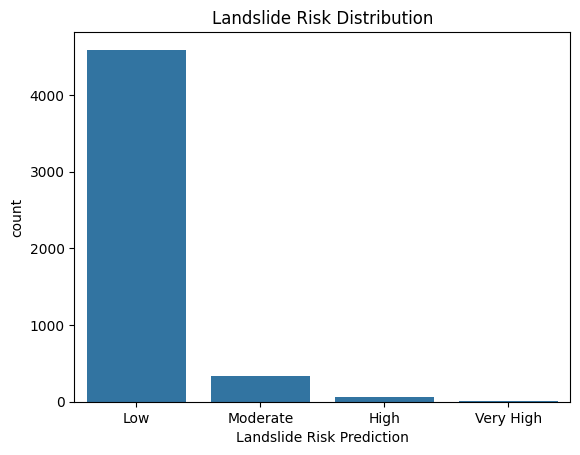

In [10]:
#Univarient Analysis
sns.countplot(x='Landslide Risk Prediction', data=df)
plt.title('Landslide Risk Distribution')
plt.show()

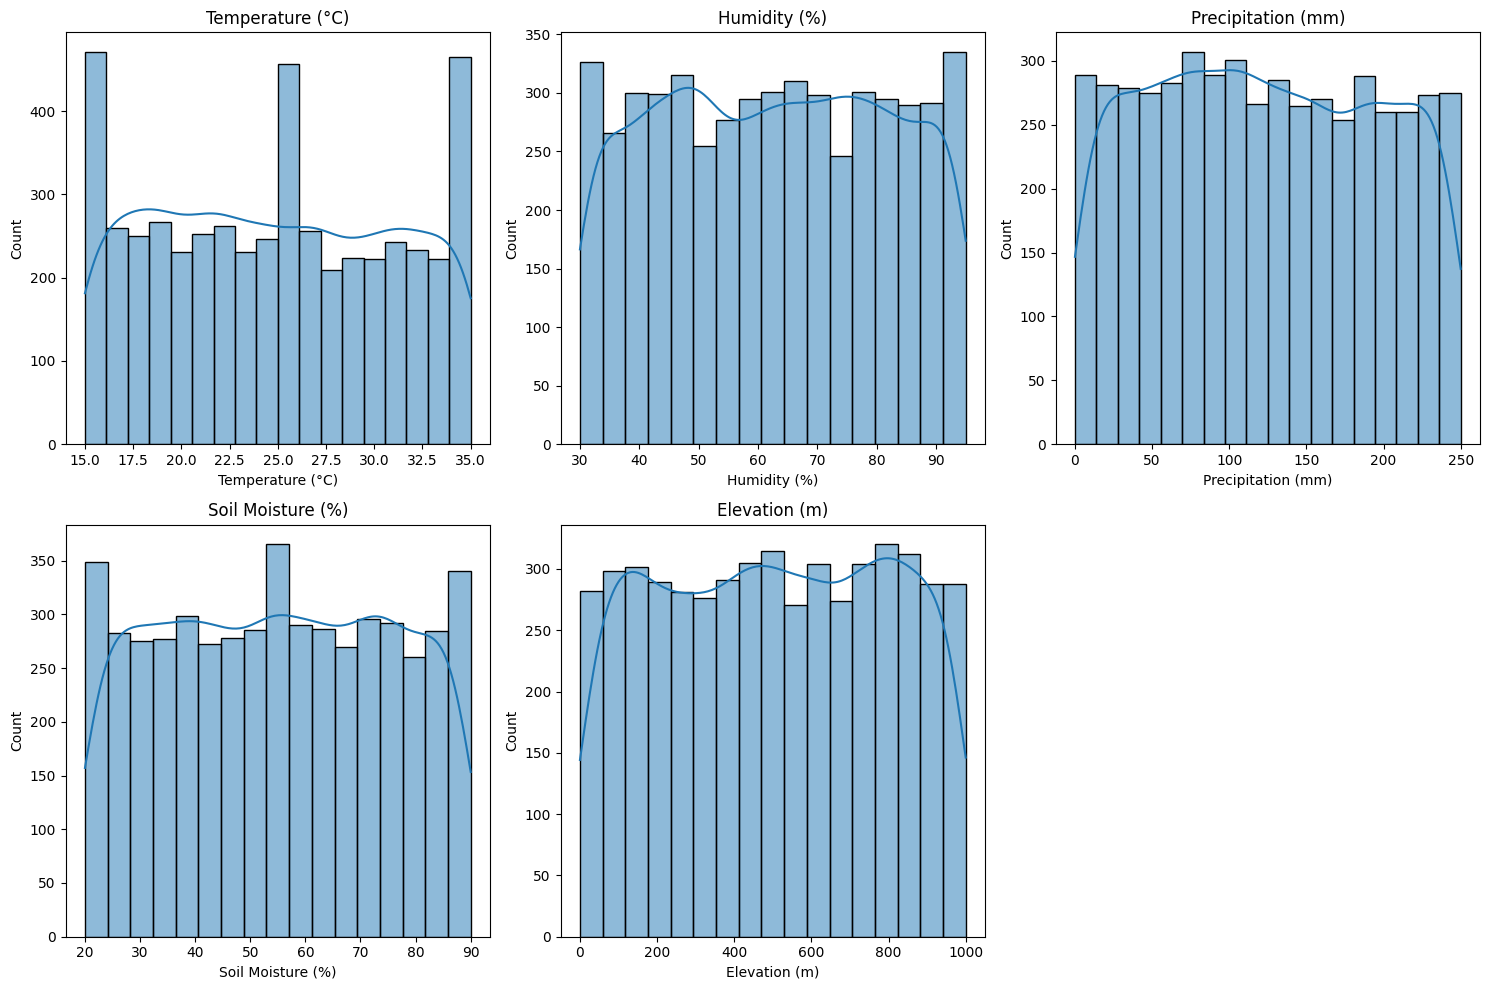

In [11]:
#Distributions
num_cols=['Temperature (°C)','Humidity (%)','Precipitation (mm)','Soil Moisture (%)','Elevation (m)']
fig,axes=plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()
for i,col in zip(axes,num_cols):
  sns.histplot(df[col],kde=True,ax=i)
  i.set_title(col)
# Hide the last axis
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

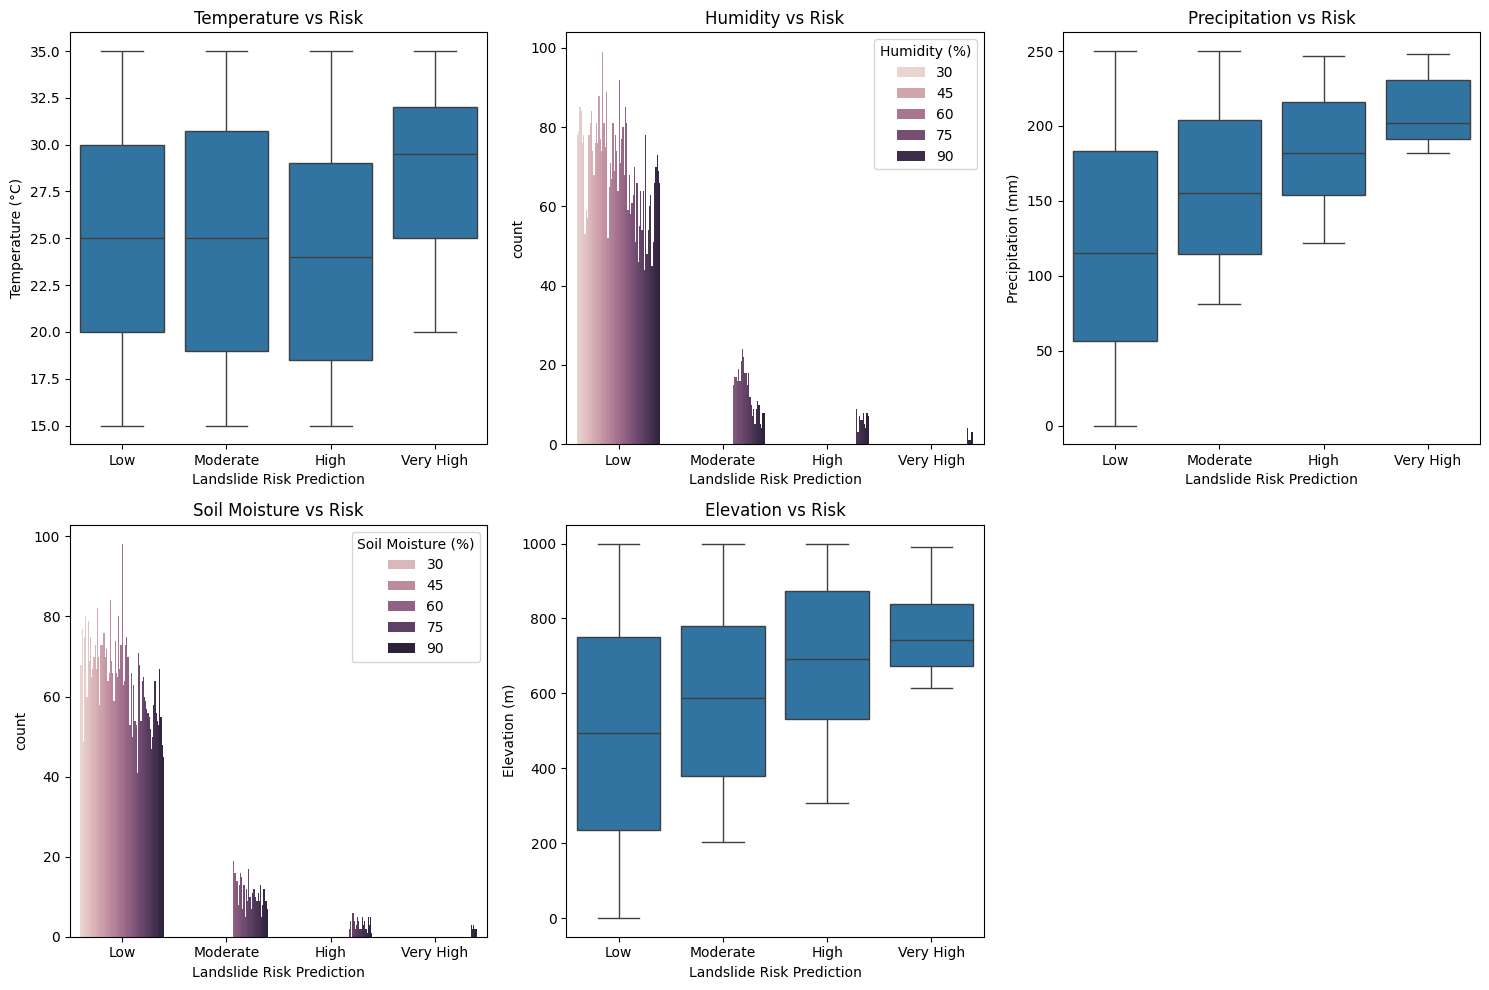

In [12]:
#Bivarient Analysis
fig,axes=plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()
sns.boxplot(x='Landslide Risk Prediction',y='Temperature (°C)',data=df,ax=axes[0]).set_title('Temperature vs Risk')
sns.countplot(x='Landslide Risk Prediction',hue='Humidity (%)',data=df,ax=axes[1]).set_title('Humidity vs Risk')
sns.boxplot(x='Landslide Risk Prediction',y='Precipitation (mm)',data=df,ax=axes[2]).set_title('Precipitation vs Risk')
sns.countplot(x='Landslide Risk Prediction',hue='Soil Moisture (%)',data=df,ax=axes[3]).set_title('Soil Moisture vs Risk')
sns.boxplot(x='Landslide Risk Prediction',y='Elevation (m)',data=df,ax=axes[4]).set_title('Elevation vs Risk')
# Hide the last axis since there are only 5 plots
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

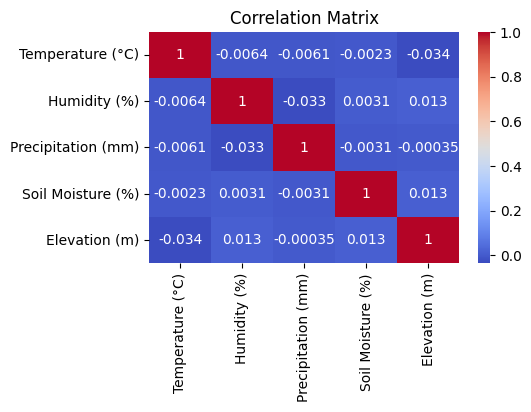

In [13]:
#Correlation matrix for numerical features
plt.figure(figsize=(5, 3))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

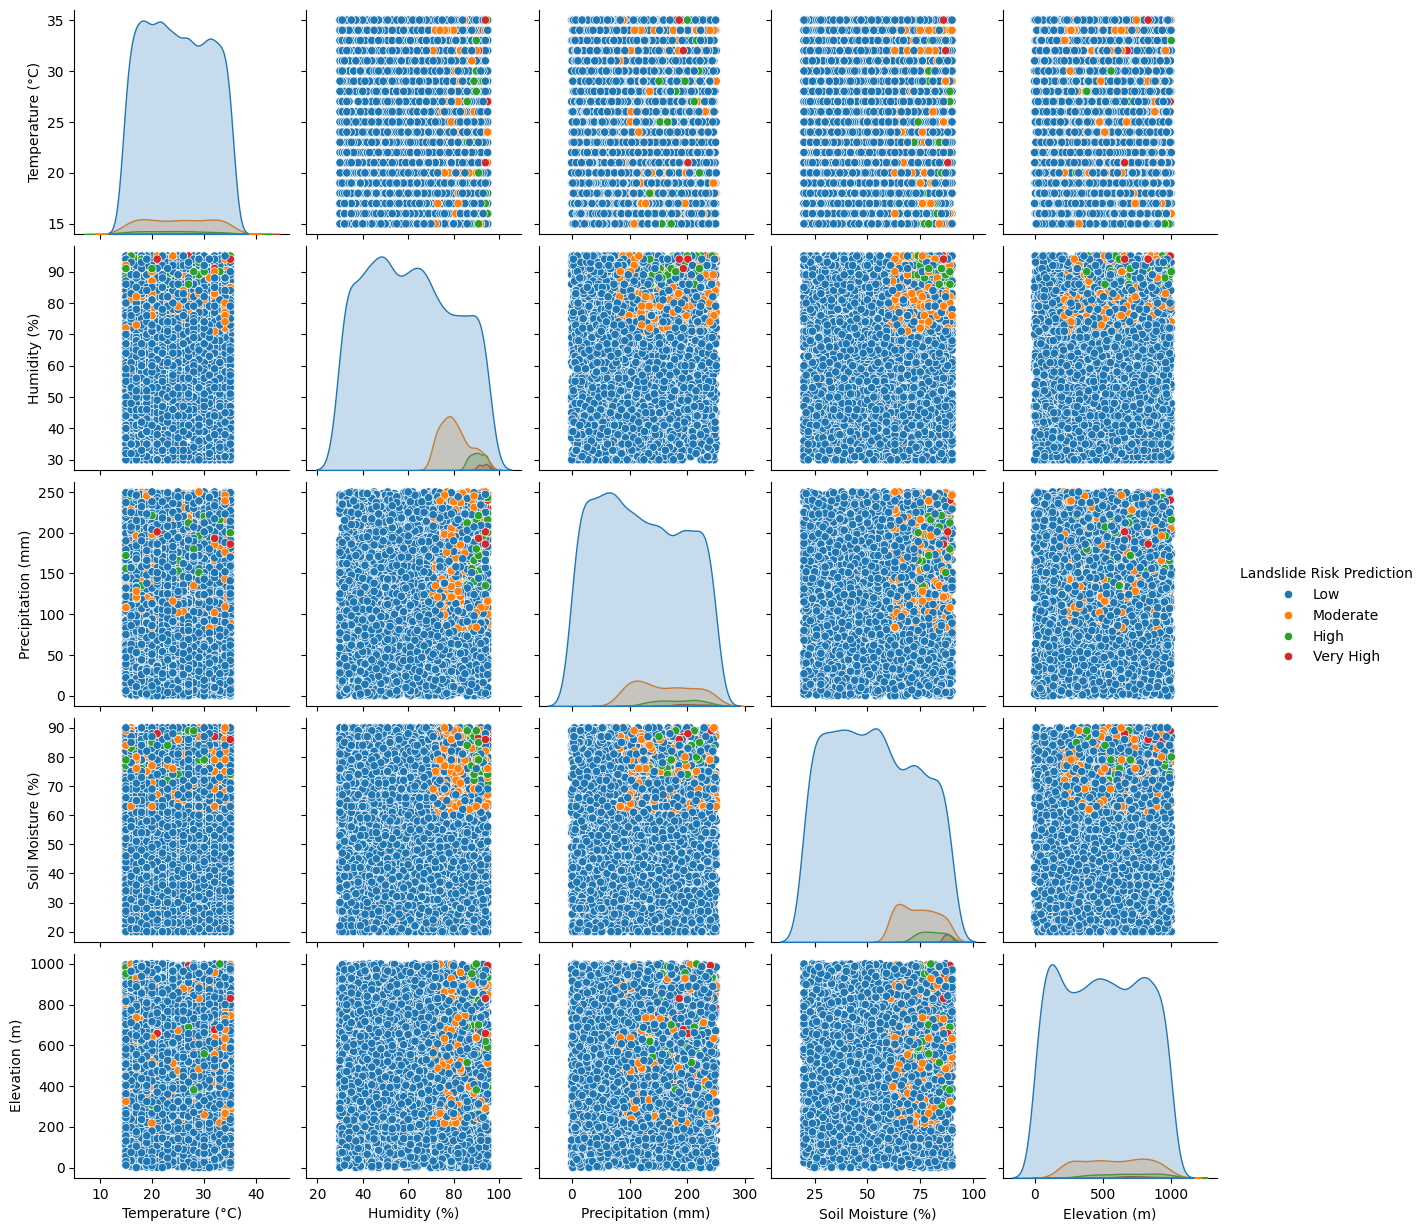

In [14]:
#Pairplot for numerical features colored by Land Risk Prediction
sns.pairplot(df, vars=num_cols, hue='Landslide Risk Prediction')
plt.show()

*Preprocess Data*

In [15]:
df.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)',
       'Soil Moisture (%)', 'Elevation (m)', 'Landslide Risk Prediction'],
      dtype='object')

In [16]:
print("Unique values in target column before encoding:", df['Landslide Risk Prediction'].unique())
le = LabelEncoder()
df['Landslide Risk Prediction'] = le.fit_transform(df['Landslide Risk Prediction'])
print("Data Head after preprocessing:")
print(df.head())
print("Unique values in target column after encoding:", df['Landslide Risk Prediction'].unique())

Unique values in target column before encoding: ['Low' 'Moderate' 'High' 'Very High']
Data Head after preprocessing:
   Temperature (°C)  Humidity (%)  Precipitation (mm)  Soil Moisture (%)  \
0                17            68                 176                 64   
1                26            33                  65                 24   
2                16            81                  56                 52   
3                25            53                 136                 70   
4                34            77                  23                 37   

   Elevation (m)  Landslide Risk Prediction  
0            120                          1  
1            672                          1  
2             36                          1  
3            583                          1  
4            130                          1  
Unique values in target column after encoding: [1 2 0 3]


In [17]:
#Feature and target selection
X = df.drop('Landslide Risk Prediction', axis=1)
y = df['Landslide Risk Prediction']

In [18]:
#Splitting the data into train and text sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 5)
Shape of X_test: (1000, 5)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


In [20]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#balancing data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

Model Selection and Model Training

In [22]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [23]:
rf=RandomForestClassifier()
rf.fit(X_train_bal,y_train_bal)

RandomForestClassifier()


XGBoost Evaluation:

Accuracy: 0.999
Precision: 0.999001107419712
Recall: 0.999
F1-score: 0.99899724670528

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        14
    Moderate       1.00      1.00      1.00       902
        High       1.00      0.99      0.99        83
   Very High       1.00      1.00      1.00         1

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:


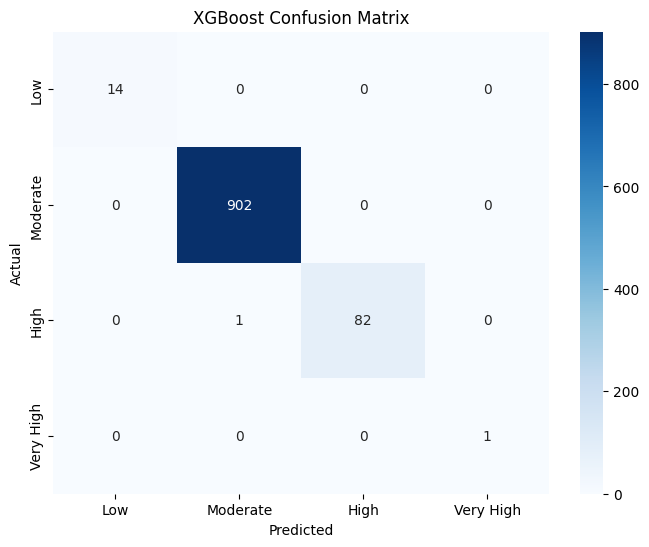


Random Forest Evaluation:

Accuracy: 0.997
Precision: 0.9970099447513813
Recall: 0.997
F1-score: 0.9969748829534768

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        14
    Moderate       1.00      1.00      1.00       902
        High       1.00      0.96      0.98        83
   Very High       1.00      1.00      1.00         1

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:


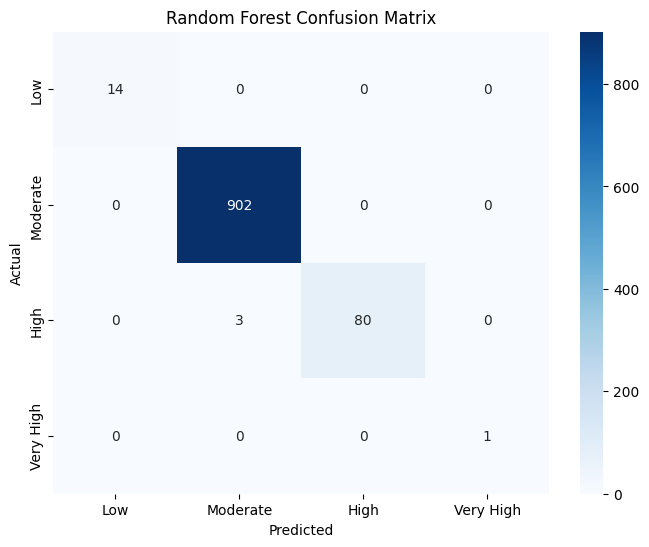

In [24]:
def evaluate_model(model, X_test, y_test,model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=[0, 1, 2, 3]) # Specify labels and average='weighted' for overall metrics
    print(f"\n{model_name} Evaluation:")
    print(f"\nAccuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,target_names=['Low', 'Moderate', 'High', 'Very High']))
    print("\nConfusion Matrix:")
    cm=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Low', 'Moderate', 'High', 'Very High'],yticklabels=['Low', 'Moderate', 'High', 'Very High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
evaluate_model(xgb, X_test_scaled, y_test,'XGBoost')
evaluate_model(rf, X_test_scaled, y_test,'Random Forest')

Correlation Matrix

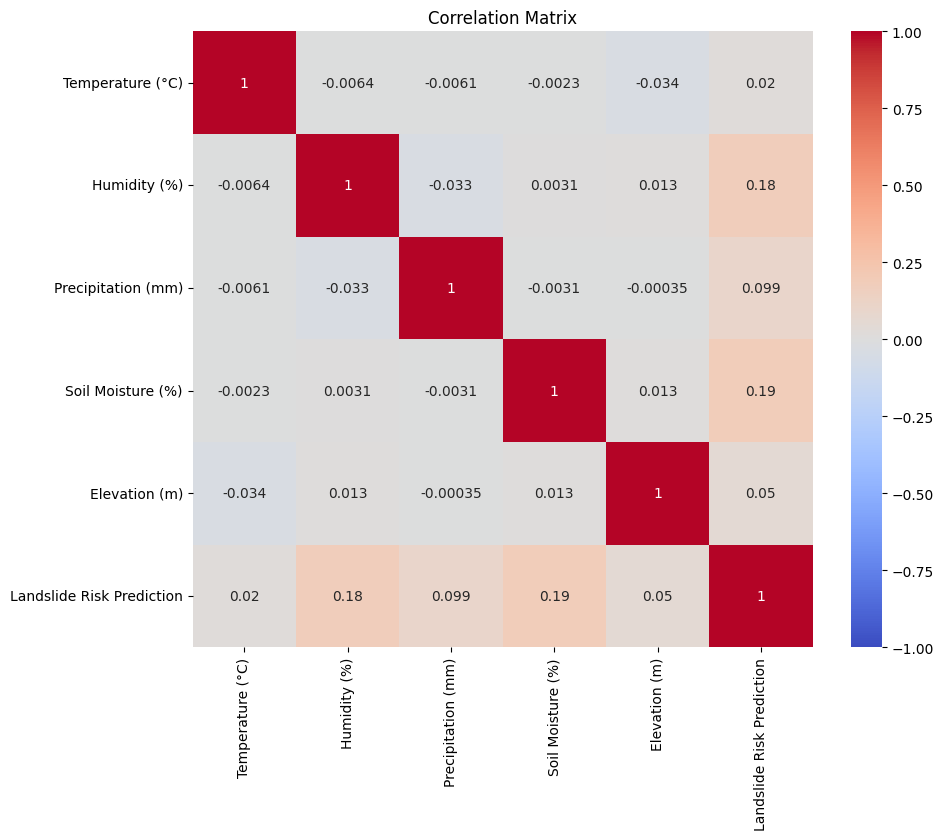

                           Temperature (°C)  Humidity (%)  Precipitation (mm)  \
Temperature (°C)                   1.000000     -0.006419           -0.006119   
Humidity (%)                      -0.006419      1.000000           -0.033448   
Precipitation (mm)                -0.006119     -0.033448            1.000000   
Soil Moisture (%)                 -0.002273      0.003067           -0.003067   
Elevation (m)                     -0.034350      0.013448           -0.000353   
Landslide Risk Prediction          0.019926      0.178645            0.099032   

                           Soil Moisture (%)  Elevation (m)  \
Temperature (°C)                   -0.002273      -0.034350   
Humidity (%)                        0.003067       0.013448   
Precipitation (mm)                 -0.003067      -0.000353   
Soil Moisture (%)                   1.000000       0.013021   
Elevation (m)                       0.013021       1.000000   
Landslide Risk Prediction           0.186674       0.0

In [25]:
df_corr=df.copy()
corr_matrix=df_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.title('Correlation Matrix')
plt.show()
print(corr_matrix)

Model Saving

In [26]:
joblib.dump(xgb, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']